In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['age']=df['age'].fillna(df['age'].mean())
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

In [ ]:
df.drop(columns=['deck'],inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
print("Duplicate rows: ", df.duplicated().sum())

# Convert some columns to category type
df['class'] = df['class'].astype('category')
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')

df.info()


Duplicate rows:  111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


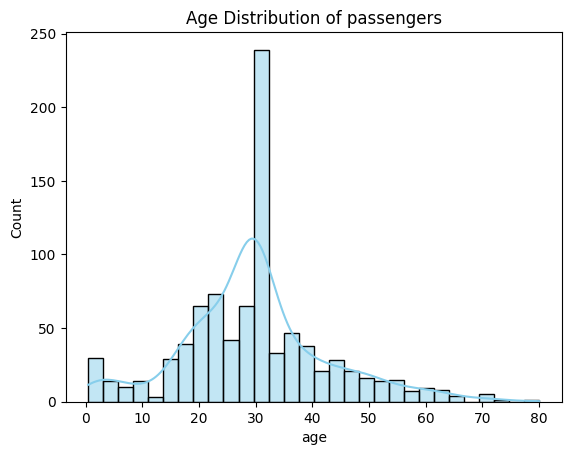

In [ ]:
#numerical data univariate
num_cols=df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()
sns.histplot(df['age'],bins=30,kde=True,color='skyblue')
plt.title("Age Distribution of passengers")
plt.show()

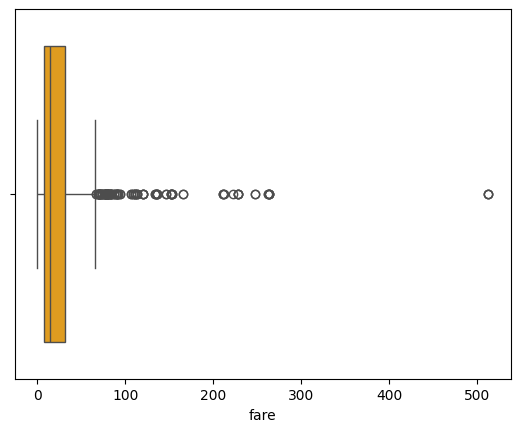

In [ ]:
sns.boxplot(x=df['fare'],color="orange")
plt.show()

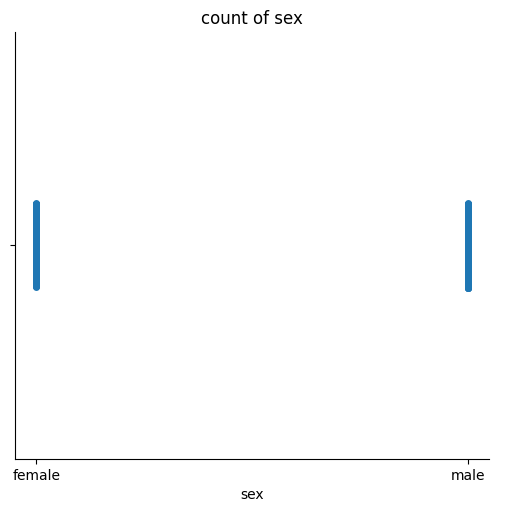

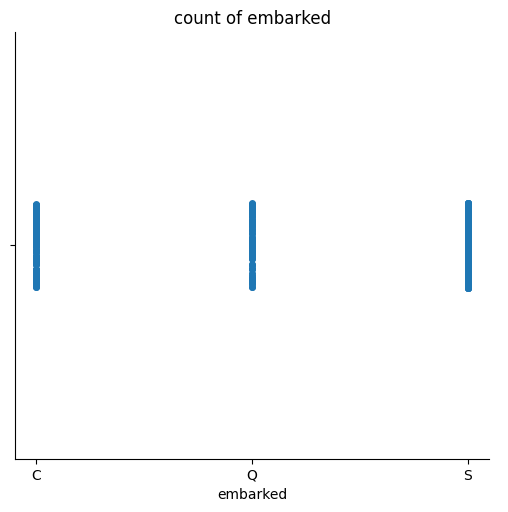

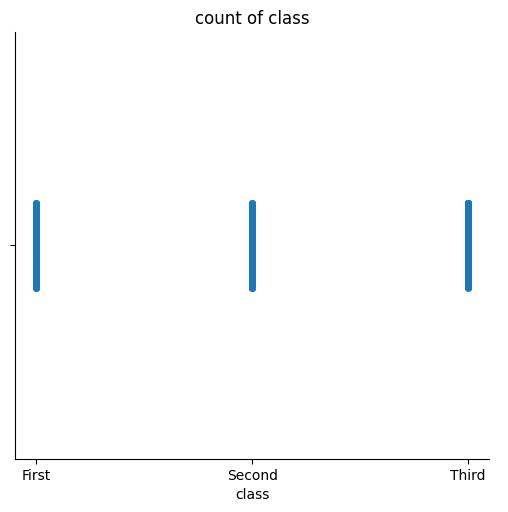

In [ ]:
#categorical data univariate
cat_cols=df.select_dtypes('category').columns
for i in cat_cols:
    sns.catplot(x=i,data=df)
    plt.title(f"count of {i}")
    plt.show()

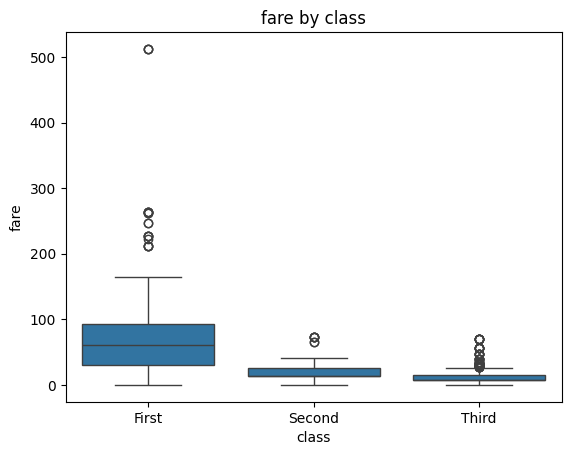

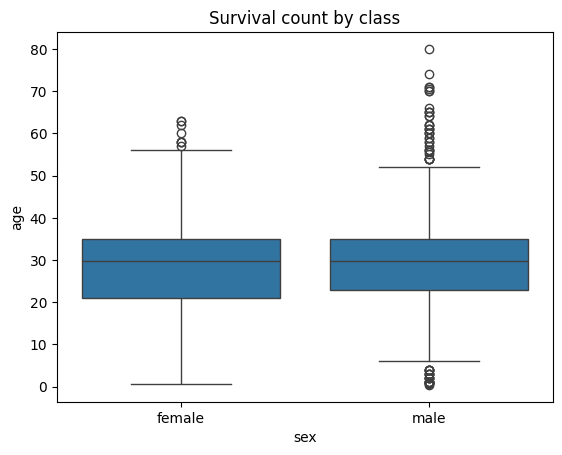

In [ ]:
#bivariate category vs numerical
sns.boxplot(x='class',y='fare',data=df)
plt.title("fare by class")
plt.show()
sns.boxplot(x='sex',y='age',data=df)
plt.title("Survival count by class")
plt.show()

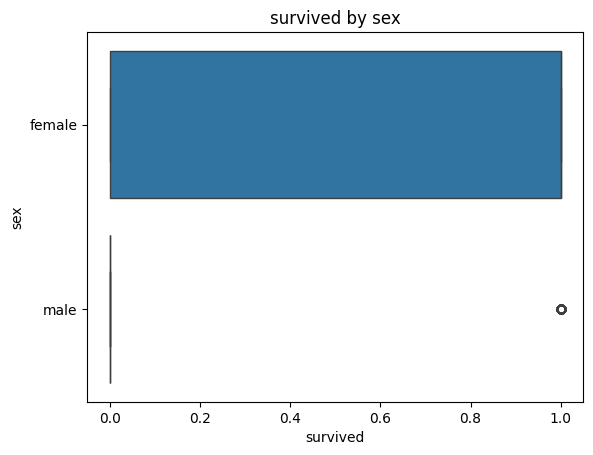

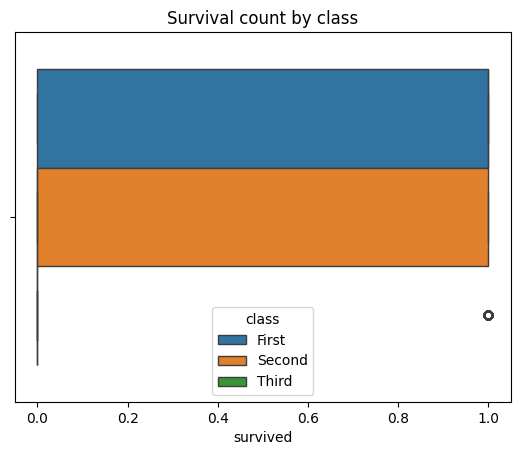

In [ ]:
#category vs category
sns.boxplot(x='survived',y='sex',data=df)
plt.title("survived cost by gender")
plt.show()
sns.boxplot(x='survived',hue='class',data=df)
plt.title("Survival count by class")
plt.show()

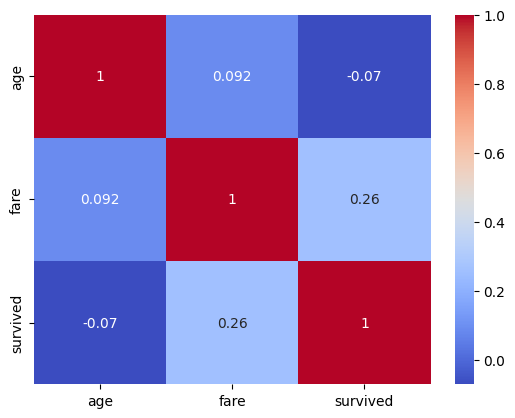

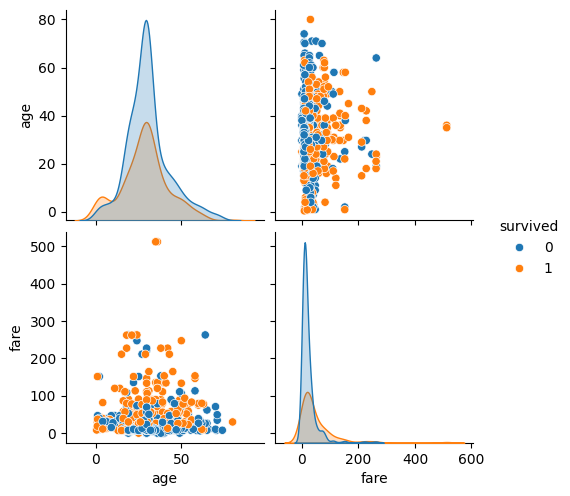

In [ ]:
corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()
sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()

Number of outliers in fare:  116


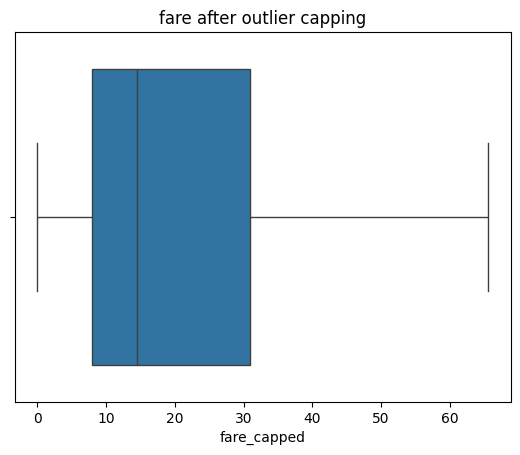

In [ ]:
#outliers with IQR
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
outliers=df[(df['fare']<lower) | (df['fare']>upper)]
print("Number of outliers in fare: ",len(outliers))
df['fare_capped']=df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title("fare after outlier capping")
plt.show()

In [2]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
features=pd.read_csv("/content/drive/MyDrive/features.csv")
stores=pd.read_csv("/content/drive/MyDrive/stores.csv")
train=pd.read_csv("/content/drive/MyDrive/train.csv")
print(features.head())
print(stores.head())
print(train.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  


In [6]:
for df_ in (features, stores, train):
    if 'Date' in df_.columns:
        df_['Date'] = pd.to_datetime(df_['Date'])

df = (
    features.merge(stores, on='Store')
            .merge(train, on=['Store', 'Date'], suffixes=('', '_train'))
)


df['IsHoliday'] = df['IsHoliday'].fillna(df['IsHoliday_train'])
df = df.drop(columns=['IsHoliday_train'])
df.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38


In [7]:
df.describe()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Dept,Weekly_Sales
count,421570.000000,421570,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,2011-06-18 08:30:31.963375360,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,44.260317,15981.258123
min,1.000000,2010-02-05 00:00:00,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,1.000000,-4988.940000
25%,11.000000,2010-10-08 00:00:00,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,18.000000,2079.650000
50%,22.000000,2011-06-17 00:00:00,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,37.000000,7612.030000
75%,33.000000,2012-02-24 00:00:00,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,74.000000,20205.852500
max,45.000000,2012-10-26 00:00:00,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,99.000000,693099.360000
std,12.785297,NaN,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,30.492054,22711.183519


In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     150681 non-null  float64       
 5   MarkDown2     111248 non-null  float64       
 6   MarkDown3     137091 non-null  float64       
 7   MarkDown4     134967 non-null  float64       
 8   MarkDown5     151432 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday     421570 non-null  bool          
 12  Type          421570 non-null  object        
 13  Size          421570 non-null  int64         
 14  Dept          421570 non-null  int64         
 15  Weekly_Sales  421

In [10]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("numeric columns:",num_cols)
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("category columns:",cat_cols)
date_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
print("date columns:",date_cols)


numeric columns: ['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Dept', 'Weekly_Sales']
category columns: ['Type']
date columns: ['Date']


In [11]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [12]:
df['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92,
       93, 94, 95, 97, 98, 78, 96, 99, 77, 39, 50, 43, 65])

In [13]:
df.isnull().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479
MarkDown4,286603
MarkDown5,270138
CPI,0


In [19]:
df['MarkDown1'].fillna(df['MarkDown1'].mean(),inplace=True)
df['MarkDown2'].fillna(df['MarkDown2'].mean(),inplace=True)
df['MarkDown3'].fillna(df['MarkDown3'].mean(),inplace=True)
df['MarkDown4'].fillna(df['MarkDown4'].mean(),inplace=True)
df['MarkDown5'].fillna(df['MarkDown5'].mean(),inplace=True)

/tmp/ipython-input-2713932505.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MarkDown1'].fillna(df['MarkDown1'].mean(),inplace=True)
/tmp/ipython-input-2713932505.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [20]:
df.isnull().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0
MarkDown4,0
MarkDown5,0
CPI,0


In [22]:
df.drop_duplicates(inplace=True)
df=df.reset_index(drop=True)

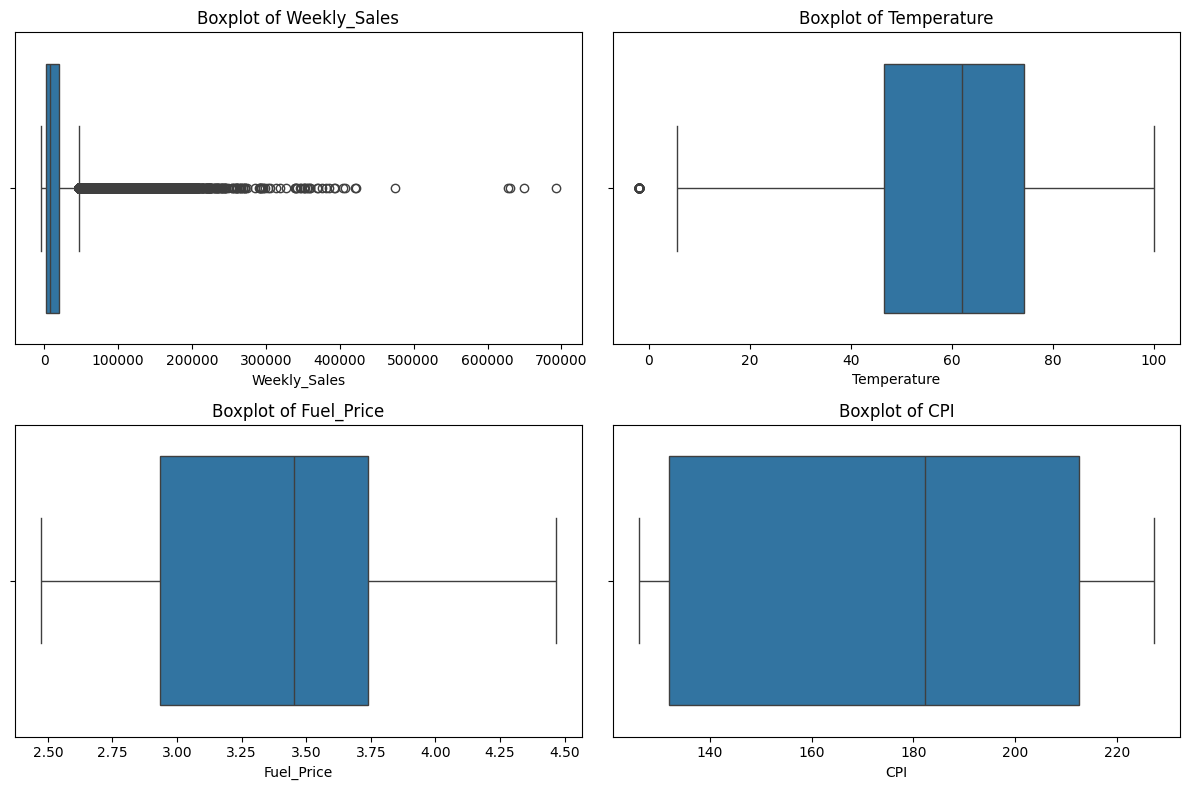

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI']

plt.figure(figsize=(12,8))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [26]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper
outlier_bounds = {}

for col in ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI']:
    lower, upper = detect_outliers_iqr(df[col])
    outlier_bounds[col] = (lower, upper)
    print(f"{col}: lower={lower}, upper={upper}")

for col in outlier_bounds:
    lower, upper = outlier_bounds[col]
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"\nOutliers in {col}: {len(outliers)} rows")


Weekly_Sales: lower=-25109.653749999998, upper=47395.15625
Temperature: lower=5.279999999999994, upper=115.68
Fuel_Price: lower=1.7254999999999996, upper=4.9455
CPI: lower=11.431177550000001, upper=333.00848195000003

Outliers in Weekly_Sales: 35521 rows

Outliers in Temperature: 69 rows

Outliers in Fuel_Price: 0 rows

Outliers in CPI: 0 rows


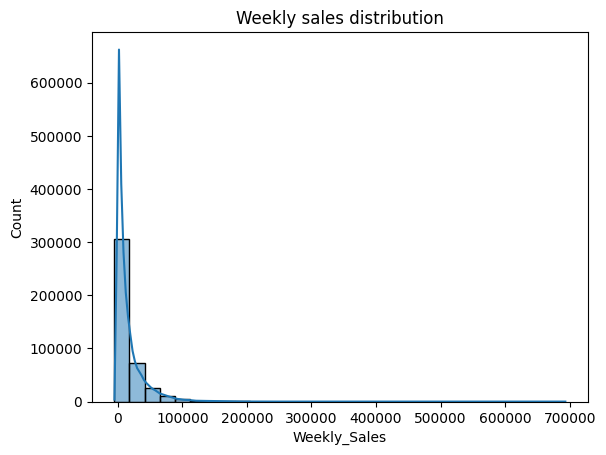

In [27]:
import seaborn as sns
sns.histplot(x=df['Weekly_Sales'],kde=True,bins=30)
plt.title("Weekly sales distribution")
plt.show()

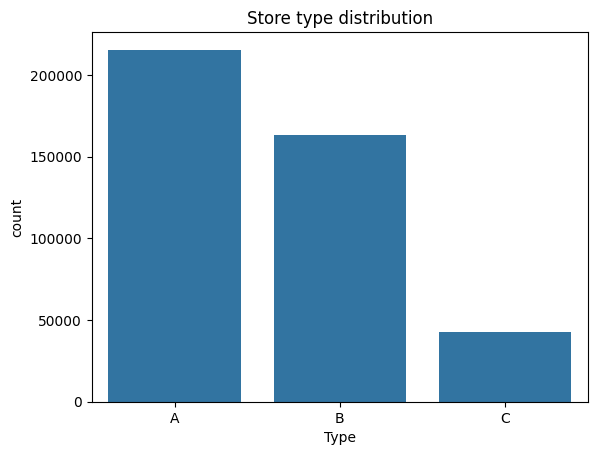

In [29]:
sns.countplot(data=df,x='Type')
plt.title("Store type distribution")
plt.show()

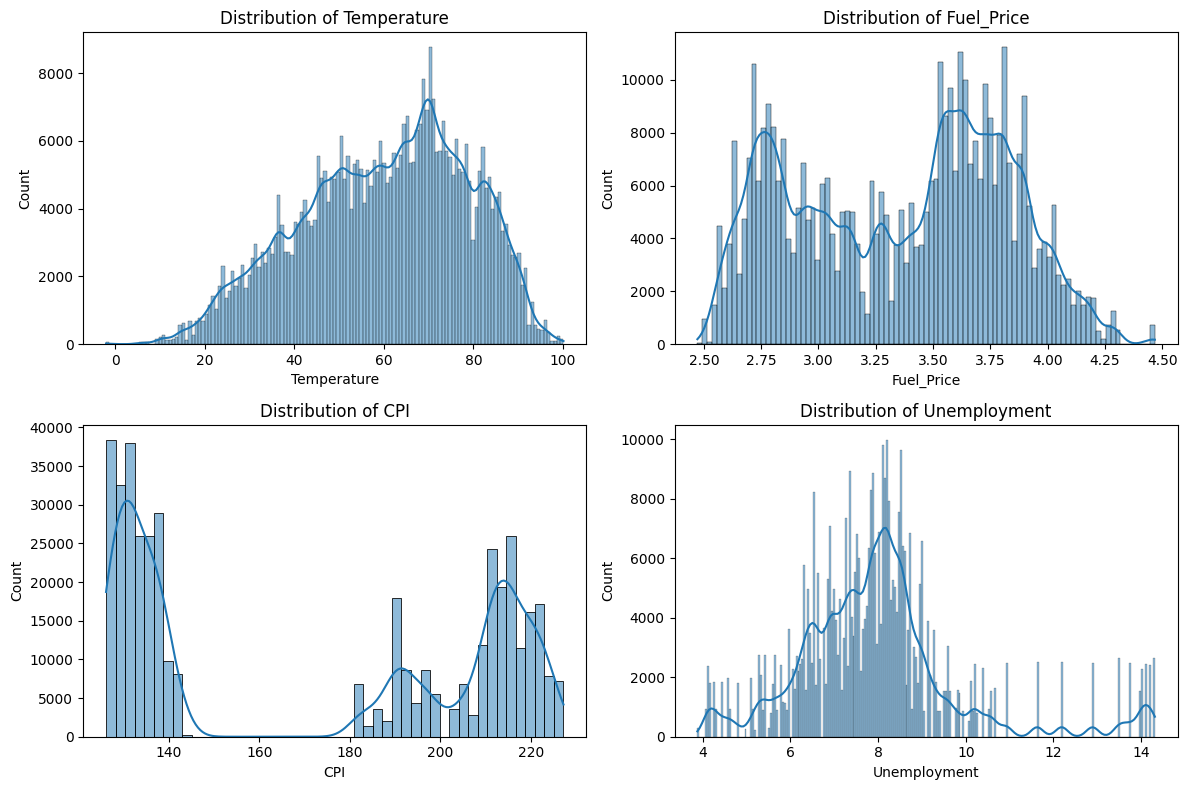

In [30]:
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

plt.figure(figsize=(12,8))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


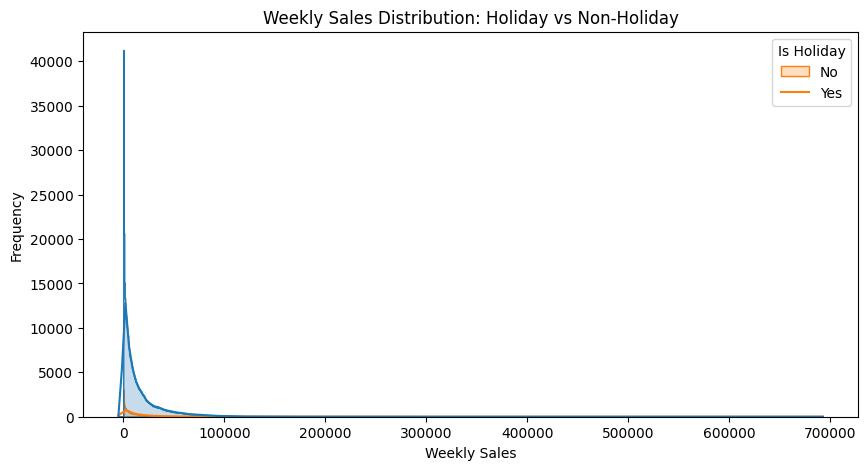

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Weekly_Sales', hue='IsHoliday', kde=True, element='step')
plt.title("Weekly Sales Distribution: Holiday vs Non-Holiday")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.legend(title="Is Holiday", labels=["No", "Yes"])
plt.show()


In [32]:
dept_avg = (df.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False).head(10))

print("Top 10 Departments by Average Weekly Sales:")
print(dept_avg)

Top 10 Departments by Average Weekly Sales:
Dept
92    75204.870531
95    69824.423080
38    61090.619568
72    50566.515417
65    45441.706224
90    45232.084488
40    44900.702727
2     43607.020113
91    33687.910758
94    33405.883963
Name: Weekly_Sales, dtype: float64


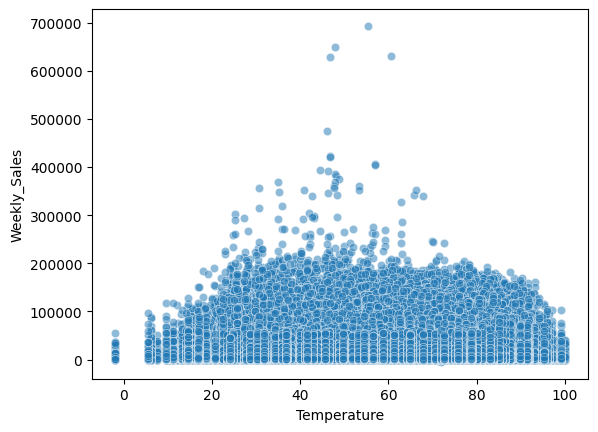

In [34]:
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', alpha=0.5)
plt.show()

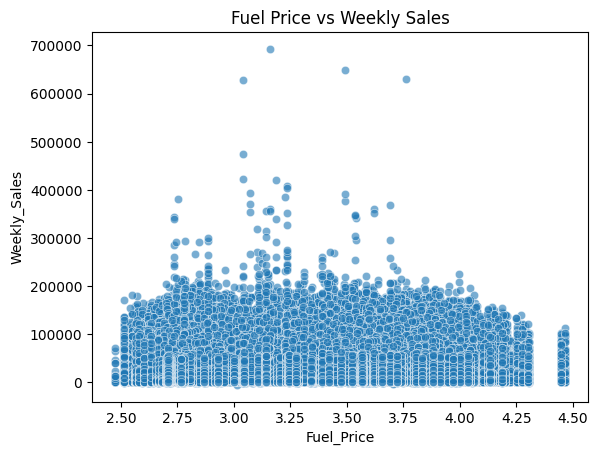

In [35]:
sns.scatterplot(data=df, x='Fuel_Price', y='Weekly_Sales', alpha=0.6)
plt.title('Fuel Price vs Weekly Sales')
plt.show()

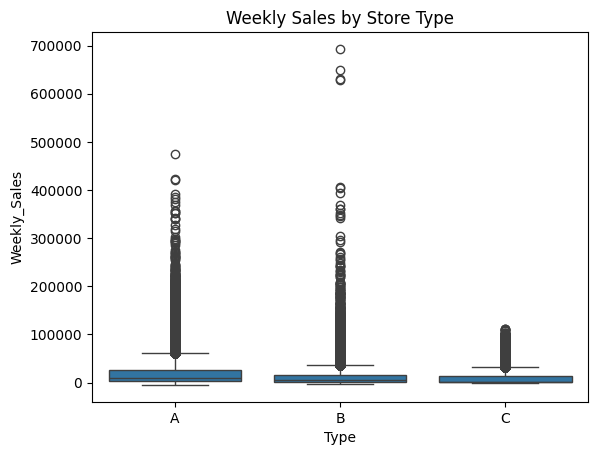

In [36]:
sns.boxplot(data=df, x='Type', y='Weekly_Sales')
plt.title('Weekly Sales by Store Type')
plt.show()


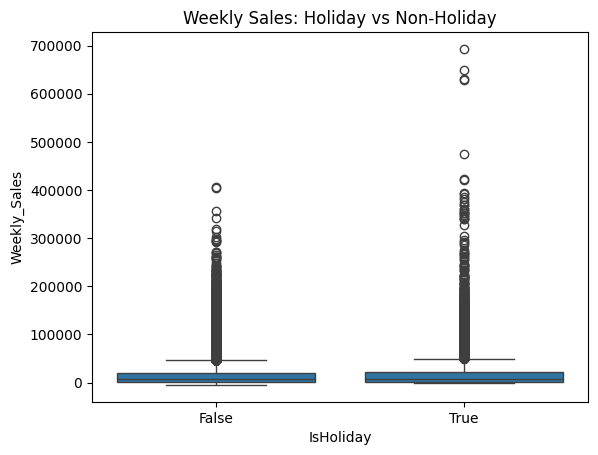

In [37]:
sns.boxplot(data=df, x='IsHoliday', y='Weekly_Sales')
plt.title('Weekly Sales: Holiday vs Non-Holiday')
plt.show()

Top-performing store (by avg weekly sales): 20
Lowest-performing store (by avg weekly sales): 5


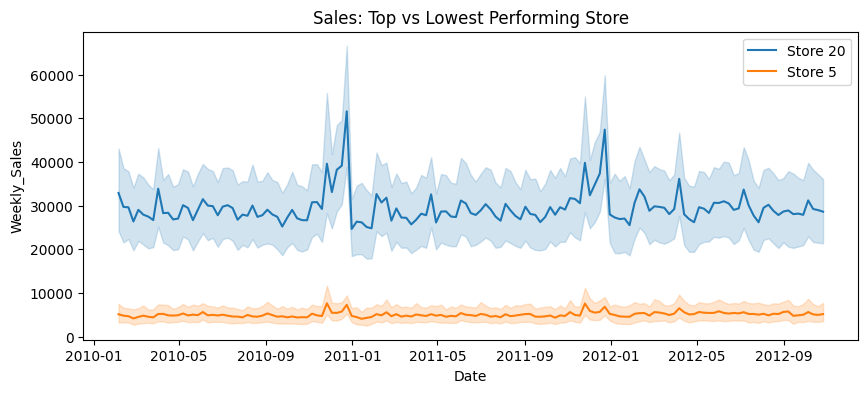

In [38]:
store_avg = df.groupby('Store', observed=True)['Weekly_Sales'].mean().sort_values(ascending=False)
top_store = store_avg.index[0]
bottom_store = store_avg.index[-1]
print(f"Top-performing store (by avg weekly sales): {top_store}")
print(f"Lowest-performing store (by avg weekly sales): {bottom_store}")

plt.figure(figsize=(10,4))
sns.lineplot(data=df[df['Store']==top_store].sort_values('Date'), x='Date', y='Weekly_Sales', label=f"Store {top_store}")
sns.lineplot(data=df[df['Store']==bottom_store].sort_values('Date'), x='Date', y='Weekly_Sales', label=f"Store {bottom_store}")
plt.title('Sales: Top vs Lowest Performing Store')
plt.legend()
plt.show()

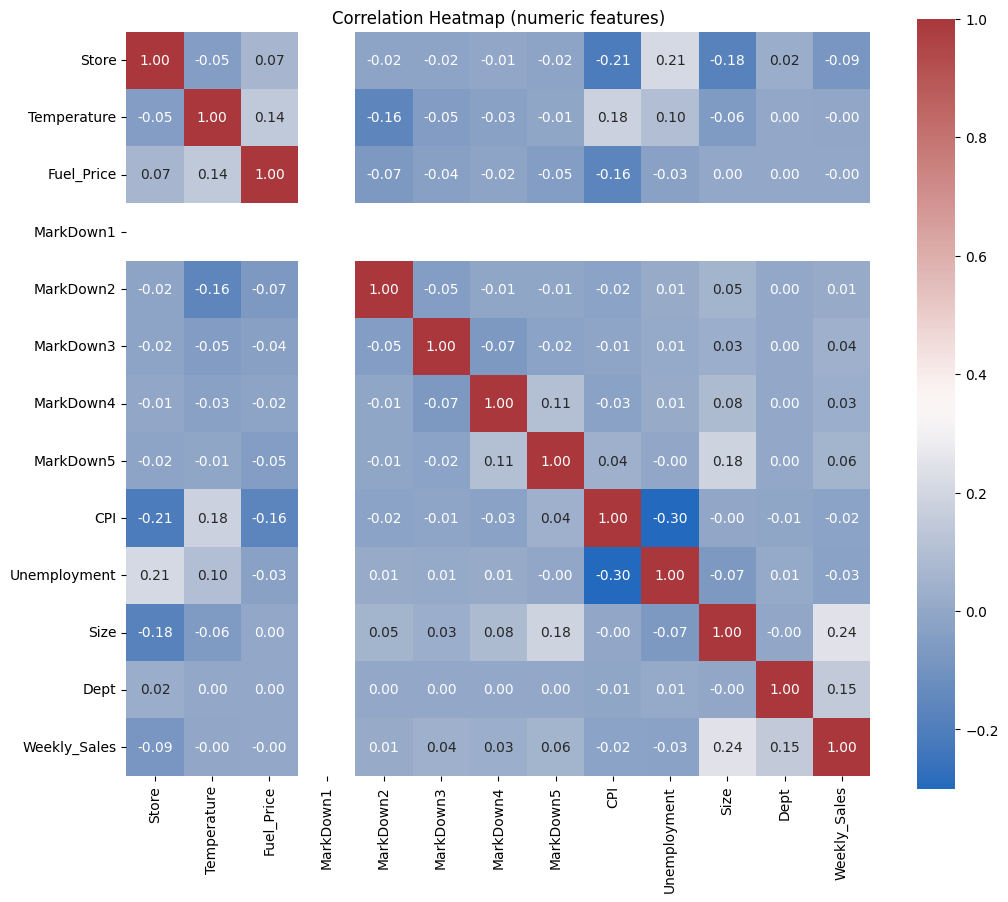

In [43]:
if not df[num_cols].empty:
    plt.figure(figsize=(12,10))
    corr = df[num_cols].corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', square=True)
    plt.title('Correlation Heatmap (numeric features)')
    plt.show()

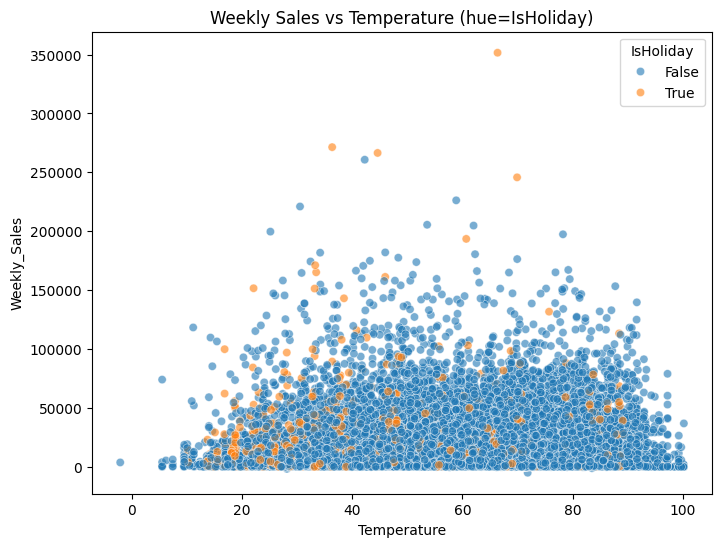

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df.sample(frac=min(1, 20000/len(df))), x='Temperature', y='Weekly_Sales', hue='IsHoliday', alpha=0.6)
plt.title('Weekly Sales vs Temperature (hue=IsHoliday)')
plt.show()

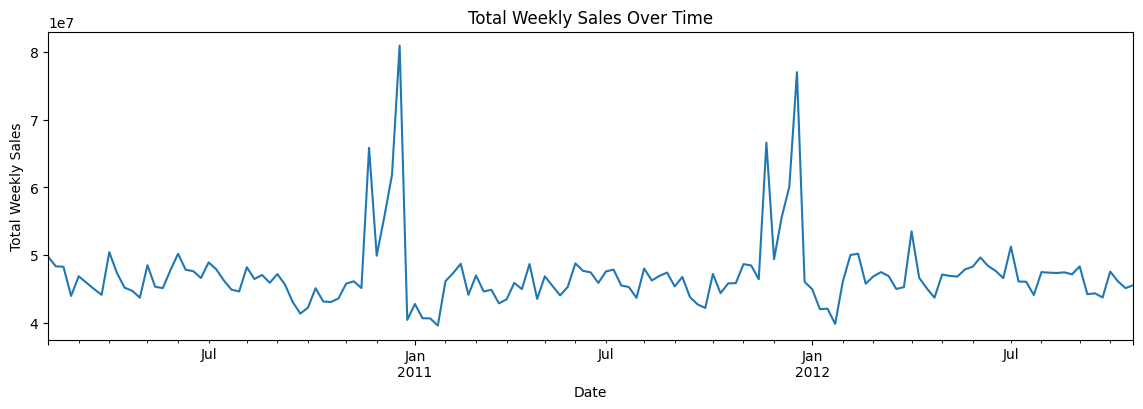

/tmp/ipython-input-3505772791.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df[df['Store']==s].groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum()


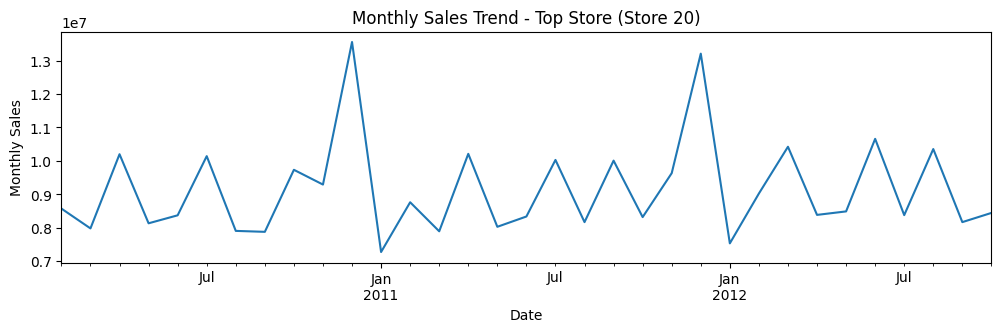

/tmp/ipython-input-3505772791.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df[df['Store']==s].groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum()


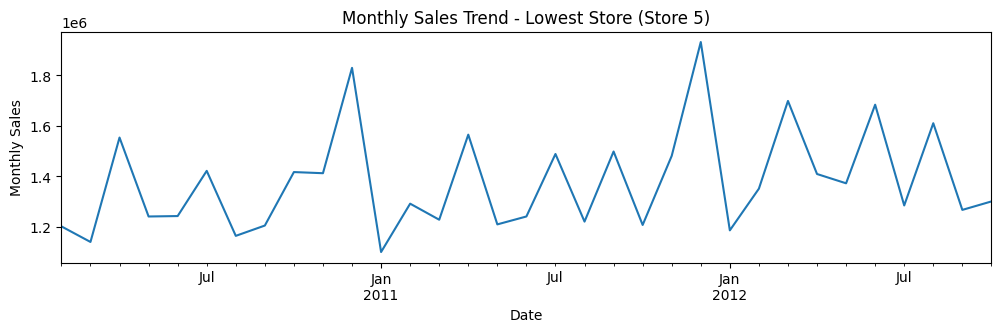

In [47]:
if 'Weekly_Sales' in df.columns:
    weekly_total = df.groupby('Date', observed=True)['Weekly_Sales'].sum().sort_index()
    plt.figure(figsize=(14,4))
    weekly_total.plot()
    plt.title('Total Weekly Sales Over Time')
    plt.ylabel('Total Weekly Sales')
    plt.show()

if {'Store','Weekly_Sales'}.issubset(df.columns):
    store_avg = df.groupby('Store', observed=True)['Weekly_Sales'].mean()
    top_store = store_avg.idxmax()
    bottom_store = store_avg.idxmin()

    for s, label in [(top_store, 'Top Store'), (bottom_store, 'Lowest Store')]:
        monthly = df[df['Store']==s].groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum()
        plt.figure(figsize=(12,3))
        monthly.plot(label=f"Store {s}")
        plt.title(f"Monthly Sales Trend - {label} (Store {s})")
        plt.ylabel('Monthly Sales')
        plt.show()

if {'month','Weekly_Sales'}.issubset(df.columns):
    month_avg = df.groupby('month', observed=True)['Weekly_Sales'].mean().sort_values(ascending=False)
    print("Months by average weekly sales (desc):")
    display(month_avg)

if {'Dept','month','Weekly_Sales'}.issubset(df.columns):
    dept_month = df.groupby(['Dept','month'], observed=True)['Weekly_Sales'].mean().unstack(fill_value=0)
    dept_peak_month = dept_month.idxmax(axis=1)
    peak_summary = dept_peak_month.reset_index().rename(columns={0:'peak_month'})
    display(peak_summary.head(10))

In [55]:
import numpy as np
possible_markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
markdown_cols = [c for c in possible_markdown_cols if c in df.columns]
if markdown_cols:
    df[markdown_cols] = df[markdown_cols].apply(lambda s: pd.to_numeric(s, errors='coerce').fillna(0))
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.isocalendar().week.astype('Int64')
if markdown_cols:
    df['discount_effect'] = df[markdown_cols].sum(axis=1)
else:
    df['discount_effect'] = 0.0

df['is_peak_season'] = df['month'].isin([11,12])

if 'Weekly_Sales' in df.columns and 'Size' in df.columns:
    df['Size_clean'] = pd.to_numeric(df['Size'], errors='coerce')
    df['normalized_sales'] = df['Weekly_Sales'] / df['Size_clean'].replace({0: np.nan})
    df = df.drop(columns=['Size_clean'])
else:
    df['normalized_sales'] = np.nan

print("Created columns: ", ['year','month','week','discount_effect','is_peak_season','normalized_sales'])

Created columns:  ['year', 'month', 'week', 'discount_effect', 'is_peak_season', 'normalized_sales']


In [56]:
peak_high_sales = pd.DataFrame()
if {'is_peak_season','Weekly_Sales'}.issubset(df.columns):
    peak_high_sales = df[df['is_peak_season'] & (df['Weekly_Sales'] > 50000)].reset_index(drop=True)
print("peak_high_sales rows:", len(peak_high_sales))

top10_norm_store_ids = []
if 'normalized_sales' in df.columns and 'Store' in df.columns:
    thresh = df['normalized_sales'].quantile(0.90)
    top10_norm_store_ids = df.loc[df['normalized_sales'] >= thresh, 'Store'].dropna().unique().tolist()
print("Top 10% normalized store IDs (count):", len(top10_norm_store_ids))

depts_high_discount = []
if 'discount_effect' in df.columns and 'Dept' in df.columns:
    med_disc = df['discount_effect'].median()
    depts_high_discount = df.loc[df['discount_effect'] > med_disc, 'Dept'].dropna().unique().tolist()
print("Departments with discount_effect > median (count):", len(depts_high_discount))

composite_filtered = pd.DataFrame()
required_cols = {'Temperature','Fuel_Price','Weekly_Sales','is_peak_season'}
if required_cols.issubset(df.columns):
    composite_filtered = df[
        (df['Temperature'] < 40) &
        (df['Fuel_Price'] > 3.5) &
        (df['Weekly_Sales'] >= 20000) & (df['Weekly_Sales'] <= 60000) &
        (df['is_peak_season'])
    ].reset_index(drop=True)
print("Composite filtered rows:", len(composite_filtered))


peak_high_sales rows: 5071
Top 10% normalized store IDs (count): 45
Departments with discount_effect > median (count): 80
Composite filtered rows: 541


In [57]:
monthly_avg_per_store = pd.DataFrame()
if {'Date','Store','Weekly_Sales'}.issubset(df.columns):
    monthly_avg_per_store = (
        df.groupby([pd.Grouper(key='Date', freq='M'), 'Store'], observed=True)['Weekly_Sales']
          .mean()
          .reset_index()
          .rename(columns={'Weekly_Sales':'avg_monthly_weekly_sales'})
    )
    monthly_avg_per_store_summary = (
        monthly_avg_per_store.groupby('Store', observed=True)['avg_monthly_weekly_sales'].mean()
        .reset_index().rename(columns={'avg_monthly_weekly_sales':'avg_monthly_sales_per_store'})
    )
    display(monthly_avg_per_store_summary.sort_values('avg_monthly_sales_per_store', ascending=False).head())

total_discount_per_dept = pd.DataFrame()
if {'Dept','discount_effect'}.issubset(df.columns):
    total_discount_per_dept = df.groupby('Dept', observed=True)['discount_effect'].sum().reset_index().sort_values('discount_effect', ascending=False)
    display(total_discount_per_dept.head())

dept_highest_normalized = pd.DataFrame()
if {'Dept','normalized_sales'}.issubset(df.columns):
    dept_norm = df.groupby('Dept', observed=True)['normalized_sales'].mean().reset_index().sort_values('normalized_sales', ascending=False)
    dept_highest_normalized = dept_norm.iloc[0]   # the top dept row (Series)
    print("Department with highest avg normalized_sales:")
    display(dept_highest_normalized)

store_revenue_potential = pd.DataFrame()
if {'Store','Weekly_Sales'}.issubset(df.columns):
    store_revenue_potential = df.groupby('Store', observed=True)['Weekly_Sales'].mean().reset_index()
    store_revenue_potential['revenue_potential'] = store_revenue_potential['Weekly_Sales'] * 52
    store_revenue_potential = store_revenue_potential.sort_values('revenue_potential', ascending=False).reset_index(drop=True)
    top10_revenue = store_revenue_potential.head(10)
    display(top10_revenue)
else:
    top10_revenue = pd.DataFrame()

print("\nSummary:")
print("Monthly avg per store rows:", len(monthly_avg_per_store))
print("Total discount per dept rows:", len(total_discount_per_dept))
print("Top 10 stores by revenue potential rows:", len(top10_revenue))


/tmp/ipython-input-3881806944.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby([pd.Grouper(key='Date', freq='M'), 'Store'], observed=True)['Weekly_Sales']


,Store,avg_monthly_sales_per_store
19,20,29442.340627
3,4,29129.157537
13,14,28724.511023
12,13,27285.192359
1,2,26861.766400


,Dept,discount_effect
0,1,1.279369e+08
1,2,1.279369e+08
2,3,1.279369e+08
3,4,1.279369e+08
6,7,1.279369e+08


Department with highest avg normalized_sales:


,73
Dept,92.000000
normalized_sales,0.641547


,Store,Weekly_Sales,revenue_potential
0,20,29508.301592,1.534432e+06
1,4,29161.210415,1.516383e+06
2,14,28784.851727,1.496812e+06
3,13,27355.136891,1.422467e+06
4,2,26898.070031,1.398700e+06
5,10,26332.303819,1.369280e+06
6,27,24826.984536,1.291003e+06
7,6,21913.243624,1.139489e+06
8,1,21710.543621,1.128948e+06
9,39,21000.763562,1.092040e+06



Summary:
Monthly avg per store rows: 1485
Total discount per dept rows: 81
Top 10 stores by revenue potential rows: 10
